## Comparing event types


In [55]:
from providers import StatsBomb, Wyscout

sb = StatsBomb()
ws = Wyscout()

In [59]:
wyscout_df = ws.events().to_df()
statsbomb_df = sb.events().to_df()

wyscout_events = set(wyscout_df.event_type.unique())
statsbomb_events = set(statsbomb_df.event_type.unique())

display("both", wyscout_events & statsbomb_events)
display("ws only", wyscout_events - statsbomb_events)
display("sb only", statsbomb_events - wyscout_events)

'both'

{'BALL_OUT',
 'CARD',
 'CLEARANCE',
 'DUEL',
 'FOUL_COMMITTED',
 'GOALKEEPER',
 'MISCONTROL',
 'PASS',
 'RECOVERY',
 'SHOT'}

'ws only'

set()

'sb only'

{'CARRY',
 'FORMATION_CHANGE',
 'GENERIC:Ball Receipt*',
 'GENERIC:Block',
 'GENERIC:Dispossessed',
 'GENERIC:Dribbled Past',
 'GENERIC:Error',
 'GENERIC:Foul Won',
 'GENERIC:Goal Keeper',
 'GENERIC:Half End',
 'GENERIC:Half Start',
 'GENERIC:Interception',
 'GENERIC:Pressure',
 'GENERIC:Starting XI',
 'SUBSTITUTION',
 'TAKE_ON'}

In [60]:
import pandas as pd

events_to_keep = wyscout_events & statsbomb_events


def clean_df(df: pd.DataFrame):
    # cols = [
    #     "event_type",
    #     "result",
    # ]
    return df[df.event_type.isin(events_to_keep)].drop(columns=["event_id"])  # [cols]


clean_df(wyscout_df)

,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,...,end_coordinates_x,end_coordinates_y,receiver_player_id,is_counter_attack,pass_type,duel_type,body_part_type,set_piece_type,goalkeeper_type,card_type
0,PASS,COMPLETE,True,1,1.644107,None,None,None,1673,38377,...,0.39,0.71,None,False,SIMPLE_PASS,None,None,None,None,None
1,PASS,COMPLETE,True,1,2.477467,None,None,None,1673,15823,...,0.27,0.37,None,False,SIMPLE_PASS,None,None,None,None,None
2,PASS,COMPLETE,True,1,4.737390,None,None,None,1673,15215,...,0.10,0.44,None,False,SIMPLE_PASS,None,None,None,None,None
3,PASS,COMPLETE,True,1,7.713793,None,None,None,1673,56038,...,0.58,0.19,None,False,LAUNCH,None,None,None,None,None
4,DUEL,WON,True,1,10.094746,None,None,None,1625,8277,...,NaN,NaN,None,False,None,AERIAL,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,DUEL,NEUTRAL,False,2,3009.910069,None,None,None,1673,173,...,NaN,NaN,None,False,None,GROUND,None,None,None,None
1583,DUEL,LOST,False,2,3011.565482,None,None,None,1625,11066,...,NaN,NaN,None,False,None,GROUND,None,None,None,None
1584,DUEL,WON,True,2,3011.565482,None,None,None,1673,None,...,NaN,NaN,None,False,None,GROUND,None,None,None,None
1585,CARD,None,None,2,3011.766957,None,None,None,1625,245364,...,NaN,NaN,None,False,None,None,None,None,None,FIRST_YELLOW


array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'coordinates_x'}>],
       [<Axes: title={'center': 'coordinates_y'}>, <Axes: >]],
      dtype=object)

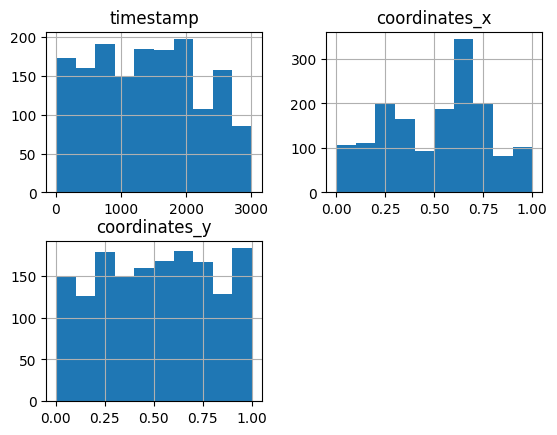

In [61]:
df = clean_df(wyscout_df)
df.hist(["timestamp", "coordinates_x", "coordinates_y"])

In [68]:
events = sb.events(event_types=["take_on"])

In [69]:
events.to_df()

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y
0,d9cbb43c-e1a4-45d1-a4b9-2151657bb62a,TAKE_ON,INCOMPLETE,False,1,427.446,None,alive,217,206,6581,0.761250,0.300625
1,cfa071d3-48cc-428b-937e-d9051145b6d7,TAKE_ON,INCOMPLETE,False,1,520.192,None,alive,217,217,5503,0.718750,0.619375
2,fd86af79-4dd3-4448-a53a-1b5a4c5895f8,TAKE_ON,COMPLETE,True,1,668.679,None,alive,206,206,6618,0.586250,0.953125
3,b3cd77a4-4051-434f-943c-4d003221a550,TAKE_ON,COMPLETE,True,1,893.952,None,alive,217,217,5246,0.772083,0.394375
4,68c2a08f-0992-4a77-a158-e0d7b8ff219d,TAKE_ON,INCOMPLETE,False,1,927.392,None,alive,217,206,6626,0.256250,0.530625
5,2134e046-d4d1-414a-8243-05c6aa03c7fe,TAKE_ON,COMPLETE,True,1,1052.099,None,alive,217,217,6379,0.921250,0.768125
6,5c3e510f-ce53-4183-b188-a9ee3ea192a4,TAKE_ON,INCOMPLETE,False,1,1367.430,None,alive,217,217,6374,0.302083,0.941875
7,059830b2-5ebe-4462-a6e8-7fcb166bb61e,TAKE_ON,COMPLETE,True,1,1414.717,None,alive,217,217,6374,0.794583,0.739375
8,586545db-0e9e-45d0-ab26-75918b56958c,TAKE_ON,INCOMPLETE,False,1,1415.380,None,alive,217,217,6374,0.832917,0.771875
9,91aad6d5-a1a4-4c45-9b5f-d1bf09b68e8c,TAKE_ON,INCOMPLETE,False,1,1420.284,None,alive,206,206,6581,0.392917,0.195625
